In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

Question 1

In [23]:
# One mark for getting a data frame that looks like this
df = pd.read_csv('question1.csv', index_col=0)
df.head()

,customers,sales
0,98,5455
1,88,4512
2,90,4696
3,97,4984
4,98,4813


In [24]:
# One mark for fitting a linear regression
# Sklearn method
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df[:200]['customers'].values.reshape(-1,1)
y = df[:200]['sales']
lr.fit(X, y)

# Statsmodels method
# If using statsmodels, you need to add a constant term manually
Xsm = sm.add_constant(X)
model = sm.OLS(y, Xsm) # Statsmodels uses (y,x) - scikit-learn uses (X, y)
result = model.fit()

In [25]:
from scipy.stats import poisson, chi2

# Recall from lecture 1 that the parameter for a Poisson distribution is the mean of the observations
# One mark for fitting both distributions
first_distribution = poisson(df[:200]['customers'].mean())
second_distribution = poisson(df[200:]['customers'].mean())

# Calculate the likelihood using the second time window for both distributions
# One mark each
likelihood_1 = np.sum(np.log(first_distribution.pmf(df[200:]['customers'])))
likelihood_2 = np.sum(np.log(second_distribution.pmf(df[200:]['customers'])))

# Perform a log likelihood test, 2 marks
log_RL = likelihood_1 - likelihood_2
test_stat = -2 * log_RL
pvalue = 1-chi2(df=1).cdf(test_stat)
pvalue 
# >>> 0.0

# One mark for saying the data has likely drifted

0.0

In [26]:
# One mark for comparing predictions on both datasets using the same model
# One mark for saying the model doesn't perform well anymore
from sklearn.metrics import mean_squared_error

pred_1 = lr.predict(df[:200]['customers'].values.reshape(-1,1))
pred_2 = lr.predict(df[200:]['customers'].values.reshape(-1,1))

print(mean_squared_error(df[:200]['sales'], pred_1))
print(mean_squared_error(df[200:]['sales'], pred_2))

93693.47481903991
456977.73865779967


Question 2

In [27]:
# One mark for getting dummy variables, one mark for concatenating
df = pd.read_csv("question2.csv")
wool_dummies = pd.get_dummies(df['wool'])
tension_dummies = pd.get_dummies(df['tension'])
X = pd.concat([wool_dummies, tension_dummies, df['temperature']], axis=1)
X.head()

,A,B,H,L,M,temperature
0,1,0,0,1,0,22.080756
1,1,0,0,1,0,26.144404
2,1,0,0,1,0,25.733504
3,1,0,0,1,0,23.589810
4,1,0,0,1,0,28.347700


In [28]:
# 2 marks for fitting the model and printing the summary
# 1 mark for identifying temperature is uncorrelated
model = sm.GLM(df['breaks'], X, family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 breaks   No. Observations:                   54
Model:                            GLM   Df Residuals:                       49
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -242.51
Date:                Thu, 15 Feb 2024   Deviance:                       210.36
Time:                        15:13:17   Pearson chi2:                     213.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8004
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
A               2.0561      0.176     11.687      0.000       1.711       2.401
B               1.8491      0.182     10.165      0.000       1.493       2.206
H               1.0635      0.123      8.626      0.000       0.822       1.305
L               1.5817      0.122     12.950      0.000       1.342       1.821
M               1.2600      0.126     10.018      0.000       1.013       1.506
temperature     0.0022      0.012      0.186      0.852      -0.021       0.025
===============================================================================
"""

In [29]:
# One mark for each model
print("===Tension model===")
model_tension = sm.GLM(df['breaks'], tension_dummies, family=sm.families.Poisson())
result_tension = model_tension.fit()
print(result_tension.summary())

print("===Wool model===")
model_wool = sm.GLM(df['breaks'], wool_dummies, family=sm.families.Poisson())
result_wool = model_wool.fit()
print(result_wool.summary())

===Tension model===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 breaks   No. Observations:                   54
Model:                            GLM   Df Residuals:                       51
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -250.55
Date:                Thu, 15 Feb 2024   Deviance:                       226.43
Time:                        15:13:17   Pearson chi2:                     235.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.7312
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
H              3.0758      0.051

In [30]:
# One mark for comparing any relevant metric (MSE, R2, etc.)
print("===MSE===")
print("Full model:", mean_squared_error(df['breaks'], result.predict(X)))
print("Wool model:", mean_squared_error(df['breaks'], result_tension.predict(tension_dummies)))
print("Tension model:", mean_squared_error(df['breaks'], result_wool.predict(wool_dummies)))

===MSE===
Full model: 121.74483310530815
Wool model: 133.30658436213992
Tension model: 162.6323731138546


Question 3

In [31]:
df = pd.read_csv("question3.csv")

# One mark for calculating duration, any unit of time is okay
df['duration'] = (pd.to_datetime(df['pt_out_room_time']) - pd.to_datetime(df['pt_in_room_time'])).dt.seconds/3600

# One mark for any groupby, one mark for all four
df_room = df.groupby("actual_operating_location")['duration'].mean()
df_specialty = df.groupby("procedure_specialty")['duration'].mean()
df_surgeon = df.groupby("surgeon_identifier")['duration'].mean()
df_procedure = df.groupby("procedure_identifier")['duration'].mean()

# One mark for any logical description of the data from the groups
# One mark for noticing the big range of values df_procedure is probably meaningful

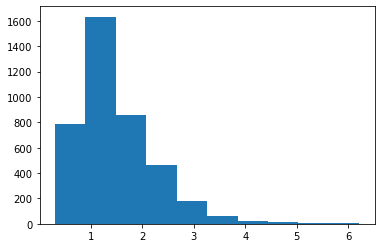

In [32]:
# One mark for any histogram of duration
import matplotlib.pyplot as plt
plt.hist(df['duration'])
plt.show()

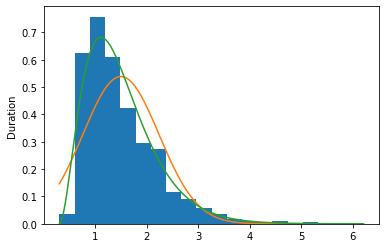

In [33]:
# One mark for each distribution fit (max 2) - does not have to be these two but it should make some sense
from scipy.stats import gamma, norm
mean, std = norm.fit(df['duration'])
alpha, loc, beta = gamma.fit(df['duration'])

# One mark for setting the bounds correctly and setting a reasonable step size
xr = np.arange(df['duration'].min(), df['duration'].max(), step=0.01)

# One mark each for getting the density
y_norm = norm(mean, std).pdf(xr)
y_gamma = gamma(alpha, loc, beta).pdf(xr)

# One mark for selecting a distribution, can be done graphically or using a log-likelihood test
plt.hist(df['duration'], density=True, bins=20)
plt.plot(xr, y_norm)
plt.plot(xr, y_gamma)
plt.ylabel("Density")
plt.ylabel("Duration")
plt.show()

In [34]:
# Choices of distribution and X here can vary
# One mark for fitting a GLM
procedure_dummies = pd.get_dummies(df['procedure_identifier'])
model = sm.GLM(df['duration'], procedure_dummies, family=sm.families.Gamma())
result = model.fit()
result.summary()

c:\Users\JENGLISH\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               duration   No. Observations:                 4036
Model:                            GLM   Df Residuals:                     3846
Model Family:                   Gamma   Df Model:                          189
Link Function:           InversePower   Scale:                         0.10785
Method:                          IRLS   Log-Likelihood:                -2087.8
Date:                Thu, 15 Feb 2024   Deviance:                       352.49
Time:                        15:13:18   Pearson chi2:                     415.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6747
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
Acromioplasty Shoulder 01                                                0.9783      0.093     10.548      0.000       0.796       1.160
Amputation Below Knee 01                                                 0.3571      0.083      4.306      0.000       0.195       0.520
Amputation Foot 02                                                       0.6569      0.088      7.459      0.000       0.484       0.830
Amputation Toe 01                                                        0.5302      0.011     49.850      0.000       0.509       0.551
Arthrodesis Ankle Arthroscopic 01                                        0.9362      0.038     24.738      0.000       0.862       1.010
Arthrodesis Ankle with Insertion Intramedullary Nail Arthroscopic 02     1.0000      0.232      4.306      0.000       0.545       1.455
Arthrodesis Ankle with Insertion Intramedullary Nail Arthroscopic 03     0.5941      0.138      4.306      0.000       0.324       0.864
Arthrodesis Hindfoot 01                                                  0.8000      0.083      9.629      0.000       0.637       0.963
Arthrodesis Hindfoot 02                                                  0.4959      0.115      4.306      0.000       0.270       0.722
Arthrodesis Hindfoot Arthroscopic 01                                     0.9877      0.115      8.613      0.000       0.763       1.212
Arthrodesis Interphalangeal Joint 01                                     0.3612      0.028     12.919      0.000       0.306       0.416
Arthrodesis Interphalangeal Joint 04                                     1.4286      0.332      4.306      0.000       0.778       2.079
Arthrodesis Scapulothoracic 02                                           0.5233      0.070      7.459      0.000       0.386       0.661
Arthrodesis Wrist 03                                                     1.0811      0.178      6.090      0.000       0.733       1.429
Arthrodesis Wrist 04                                                     0.2857      0.047      6.090      0.000       0.194       0.378
Arthrodesis Wrist Partial 02                                             0.5065      0.030     16.679      0.000       0.447       0.566
Arthroplasty Ankle 02                                                    0.9231      0.214      4.306      0.000       0.503       1.343
Arthroplasty Ankle Hintegra 01                                           0.5797      0.095      6.090      0.000       0.393       0.766
Arthroplasty Ankle Hintegra 04                                           1.1321      0.186      6.090      0.000       0.768       1.496
Arthroplasty Ankle Hintegra 05                                       

In [35]:
# Metrics and figures may vary
# Marks for anything that is logical and appropriate
# Max marks is reserved for answers that address real-world value, not just statistical value
mean_duration = np.repeat(df['duration'].mean(), len(df['duration']))
predicted_duration = result.predict(procedure_dummies)
print(mean_squared_error(df['duration'], mean_duration))
print(mean_squared_error(df['duration'], predicted_duration))
# >>> Mean squared error decreased, means the prediction is more accurate

# >>> Predicting a distribution can help make a schedule robust to uncertainty
# >>> GLM gives us the ability to expand the model later

0.5489847855371474
0.2582461497688831
